In [1]:
import argparse
import matplotlib.pyplot as plt
from mxnet import nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.model_zoo import get_model
from gluoncv.data.transforms.presets.imagenet import transform_eval
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

In [5]:
model = 'SE_ResNext101_64x4d'
saved_params = ''
images = [  "images/panda.jpg",
            "images/snake.jpg",
            "images/anaconda.jpg",
            "images/cars.jpg",            
            "images/sword.jpg",
            "images/shark.jpg",
            "images/spider.jpg",
            "images/human.jpg",
            "images/womanface.jpg",
            "images/pandanoise(50.50).jpg",
            "images/pandanoise(75.75).jpg",
            "images/pandanoise(100.100).jpg"]

In [3]:
# Load Model
model_name = model
pretrained = True if saved_params == '' else False
net = get_model(model_name, pretrained=pretrained)

if not pretrained:
    net.load_parameters(opt.saved_params)

Model file is not found. Downloading.


100%|████████████████████████████████████████████████████████████████████████| 319607/319607 [01:04<00:00, 4924.57KB/s]


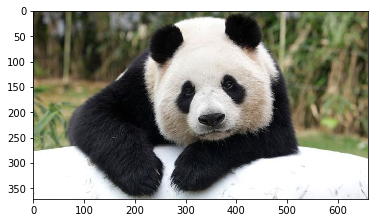

	0.92% : giant panda
	0.00% : lesser panda
	0.00% : soccer ball
	0.00% : whiskey jug
	0.00% : coffeepot


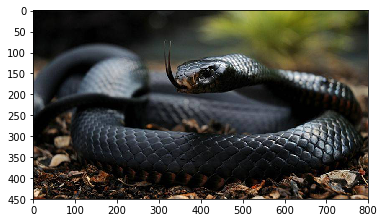

	0.88% : Indian cobra
	0.02% : sidewinder
	0.01% : night snake
	0.01% : horned viper
	0.01% : diamondback


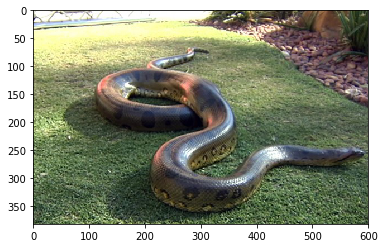

	0.63% : rock python
	0.05% : night snake
	0.03% : Indian cobra
	0.02% : thunder snake
	0.02% : boa constrictor


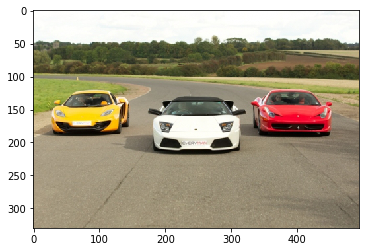

	0.88% : sports car
	0.03% : racer
	0.01% : car wheel
	0.00% : passenger car
	0.00% : convertible


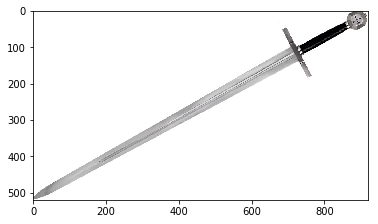

	0.73% : ladle
	0.11% : letter opener
	0.06% : scabbard
	0.03% : spatula
	0.01% : microphone


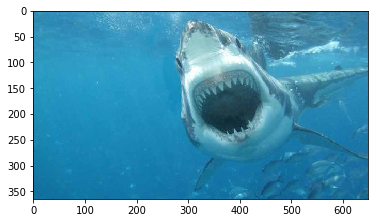

	0.66% : great white shark
	0.27% : tiger shark
	0.00% : stole
	0.00% : Lakeland terrier
	0.00% : killer whale


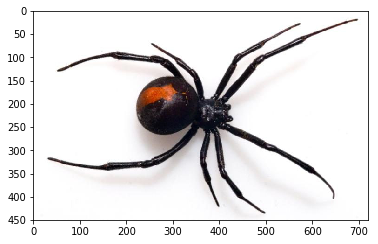

	0.90% : black widow
	0.04% : barn spider
	0.00% : harvestman
	0.00% : tick
	0.00% : black and gold garden spider


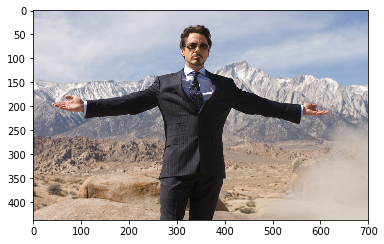

	1.00% : suit
	0.00% : Windsor tie
	0.00% : Loafer
	0.00% : groom
	0.00% : bow tie


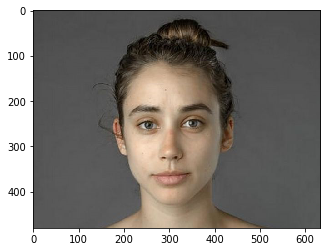

	0.11% : suit
	0.05% : Windsor tie
	0.05% : jersey
	0.05% : bow tie
	0.05% : brassiere


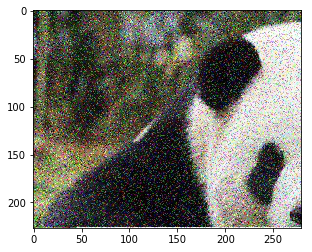

	0.98% : giant panda
	0.00% : soccer ball
	0.00% : Old English sheepdog
	0.00% : lesser panda
	0.00% : whiskey jug


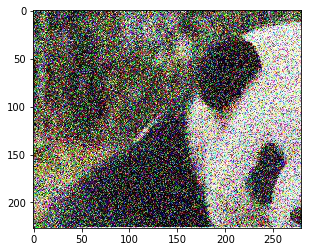

	0.97% : giant panda
	0.00% : colobus
	0.00% : badger
	0.00% : coffeepot
	0.00% : soccer ball


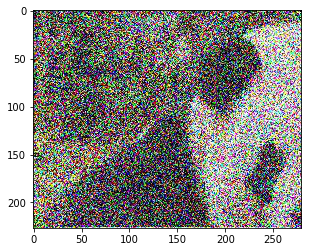

	0.31% : Border terrier
	0.07% : Saint Bernard
	0.04% : pug
	0.04% : wallet
	0.04% : beagle


In [6]:
# Load Images
for im in images :
    #imshow(imread(im))
    #print(im)
    img = image.imread(im)
    plt.figure()
    im = Image.open(im)
    plt.imshow(im)
    plt.show()
    # Transform
    img = transform_eval(img)
    pred = net(img)
    topK = 5
    ind = nd.topk(pred, k=topK)[0].astype('int')
    for i in range(topK):
        print('\t%.2f%% : %s'%
              (nd.softmax(pred)[0][ind[i]].asscalar(), net.classes[ind[i].asscalar()]))